In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['patch.linewidth'] = 0  

save_plots = False # set to true to save the plots to disk in addition to showing them in the notebook

In [2]:
def make_bars_segment(ax, bins, nn, labels, n_total, title, xuplim=None, data_limit=None, errors = False):
    if errors:
        ax.barh(bins, nn, align='center', color=colors[:data_limit], 
            xerr=nn**0.5, ecolor='k', capsize=0)
    else:
        ax.barh(bins, nn, align='center', color=colors[:data_limit])        
    
    if labels is not None:
        ax.set_yticks(bins)
        ax.set_yticklabels(labels, fontsize=15)
    else:
        ax.set_yticks([])
    if data_limit is not None:
        ax.set_ylim([0, data_limit+1])
    if xuplim is not None:
        ax.set_xlim([0, xuplim])
    for x, xe, y in zip(nn, nn**0.5, bins):
        if errors:
            ax.text(x + xe + .005*ax.get_xlim()[1], y, 
                r'${:2.0f} \pm {:2.0f}$ %'.format(x*100/n_total, xe*100/n_total), ha='left', va='center', fontsize=15)
        else:
            ax.text(x + xe + .005*ax.get_xlim()[1], y, 
                r'${:2.0f}$ %'.format(x), ha='left', va='center',fontsize=14)            
    ax.tick_params(axis="x", which="both", top=False)
    ax.tick_params(axis="y", which="both", left=False, right=False)
    ax.set_title(title, fontsize=16)
 

US AAS Membership - Academic Experience and Employment Status
------------------

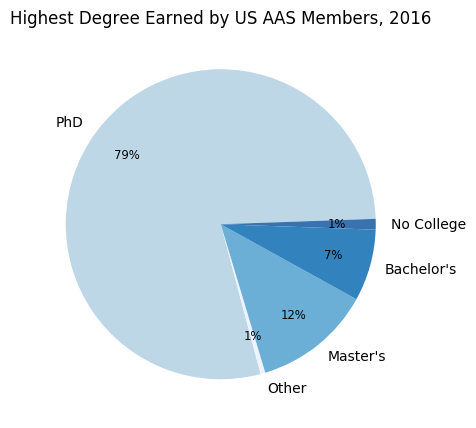

In [3]:
# Table 1 - Highest Degree Earned by US AAS Members, 2016
percents = [79,1,12,7,1]
num =  [1409,9,221,134,20]
labels = ['PhD','Other',"Master's","Bachelor's",'No College']

fig,axes = plt.subplots(1, 1, sharey=False, figsize=(5,5))

fig = plt.figure(1,figsize=(5,5))
a1 = plt.subplot(1,1,1)
colors=['#bdd7e7','#eff3ff','#6baed6','#3182bd','#3973af']
patches, texts, autotexts = a1.pie(num, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=2, pctdistance=0.75, labeldistance=1.1)
for t in autotexts:
    t.set_size('small')
a1.set_title('Highest Degree Earned by US AAS Members, 2016', fontsize=12)

if save_plots:
    plt.savefig('degree_earned.pdf')

In [4]:
# Table 2 - Year of degree
# show distribution

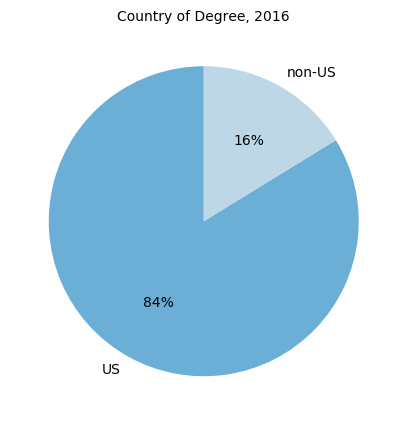

In [6]:
# Table 3 - Country of degree
percent = [84, 16]
number = [1171,227]
labels = ['US','non-US']

fig,axes = plt.subplots(1, 1, sharey=False, figsize=(5,5))

fig = plt.figure(1,figsize=(5,5))
a1 = plt.subplot(1,1,1)
colors=['#6baed6','#bdd7e7']
a1.pie(number, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90, pctdistance=0.6)
a1.set_title('Country of Degree, 2016', fontsize=10)

if save_plots:
    plt.savefig('year_degree_earned.pdf')

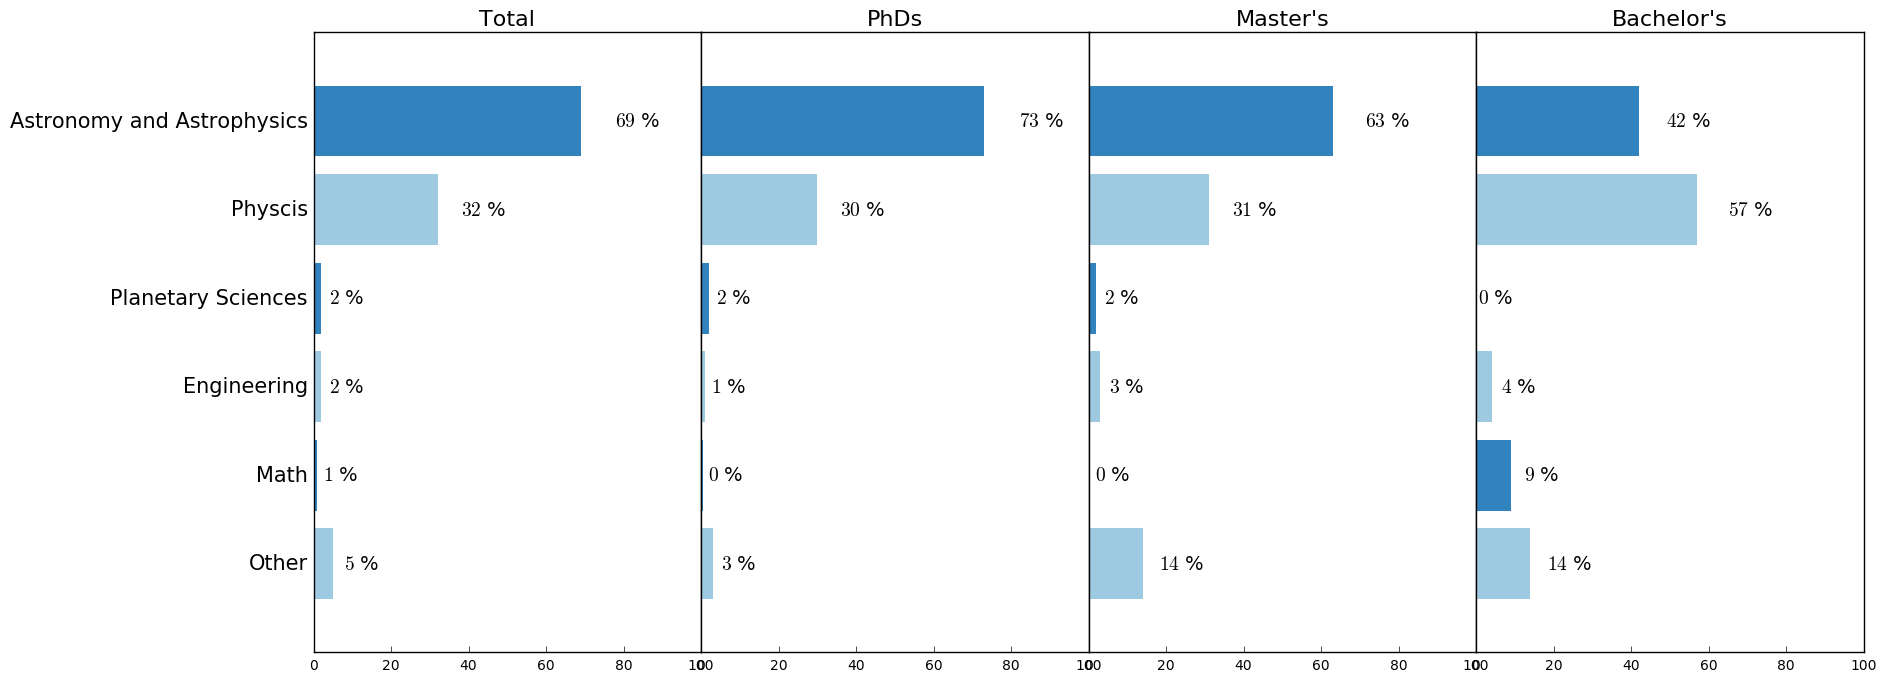

In [7]:
# Table 4 - Field of degree
# sum exceeds 100 % because some selected more than one option
labels = ['Astronomy and Astrophysics','Physcis','Planetary Sciences','Engineering','Math','Other']
bachelors_percent = [42,57,0,4,9,14]
masters_percent = [63,31,2,3,0.5,14]
phd_percent = [73,30,2,1,0.5,3]
total_percent = [69,32,2,2,1,5]
total_number = [1208,1189,36,27,20,94]
len_data = len(total_number)

bins = np.arange(len_data, 0, -1)
colors = ['#3182bd','#9ecae1']*int(math.ceil(len_data/2))
fig,axes = plt.subplots(1, 4, sharey=True, figsize=(20,8))
fig.subplots_adjust(wspace=0)

a1 = plt.subplot(1,4,1)
make_bars_segment(a1, bins, np.array(total_percent), labels, np.sum(total_percent), 'Total', 100, 6)

a2 = plt.subplot(1,4,2)
make_bars_segment(a2, bins, np.array(phd_percent), None, np.sum(phd_percent), 'PhDs', 100,6)

a3 = plt.subplot(1,4,3)
make_bars_segment(a3, bins, np.array(masters_percent), None, np.sum(masters_percent), "Master's", 100, 6)

a4 = plt.subplot(1,4,4)
make_bars_segment(a4, bins, np.array(bachelors_percent), None, np.sum(bachelors_percent), "Bachelor's", 100, 6)



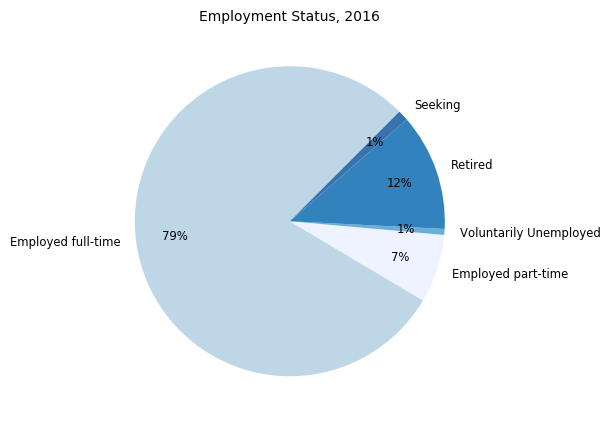

In [8]:
# Table 5 - employment status
# list %s for seeking employment and volunary out of work force
percent = [79,7,1,12,1]
number = [1141,103,9,176,16]
labels = ['Employed full-time','Employed part-time','Voluntarily Unemployed','Retired','Seeking',]

fig,axes = plt.subplots(1, 1, sharey=False, figsize=(5,5))

fig = plt.figure(1,figsize=(4,4))
a1 = plt.subplot(1,1,1)
colors=['#bdd7e7','#eff3ff','#6baed6','#3182bd','#3973af']
patches, texts, autotexts = a1.pie(number, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=45, pctdistance=0.75)
a1.set_title('Employment Status, 2016', fontsize=10)
for t,tt in zip(texts,autotexts):
    tt.set_size('small')
    t.set_size('small')
if save_plots:
    plt.savefig('year_degree_earned.pdf')

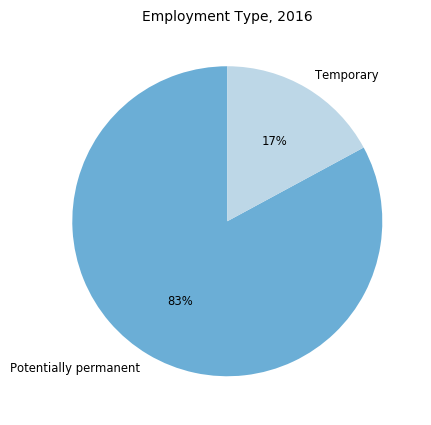

In [9]:
# Table 6 - Employment type
# how were those selected? all with phds? please lists stats for adjuncts specifically (but also other common types)
percent = [83,17]
number = [1027,212]
labels = ['Potentially permanent','Temporary']

fig,axes = plt.subplots(1, 1, sharey=False, figsize=(5,5))

fig = plt.figure(1,figsize=(5,5))
a1 = plt.subplot(1,1,1)
colors=['#6baed6','#bdd7e7']
patches, texts, autotexts = a1.pie(number, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90, pctdistance=0.6)
for t,tt in zip(texts,autotexts):
    tt.set_size('small')
    t.set_size('small')

a1.set_title('Employment Type, 2016', fontsize=10)

if save_plots:
    plt.savefig('year_degree_earned.pdf')

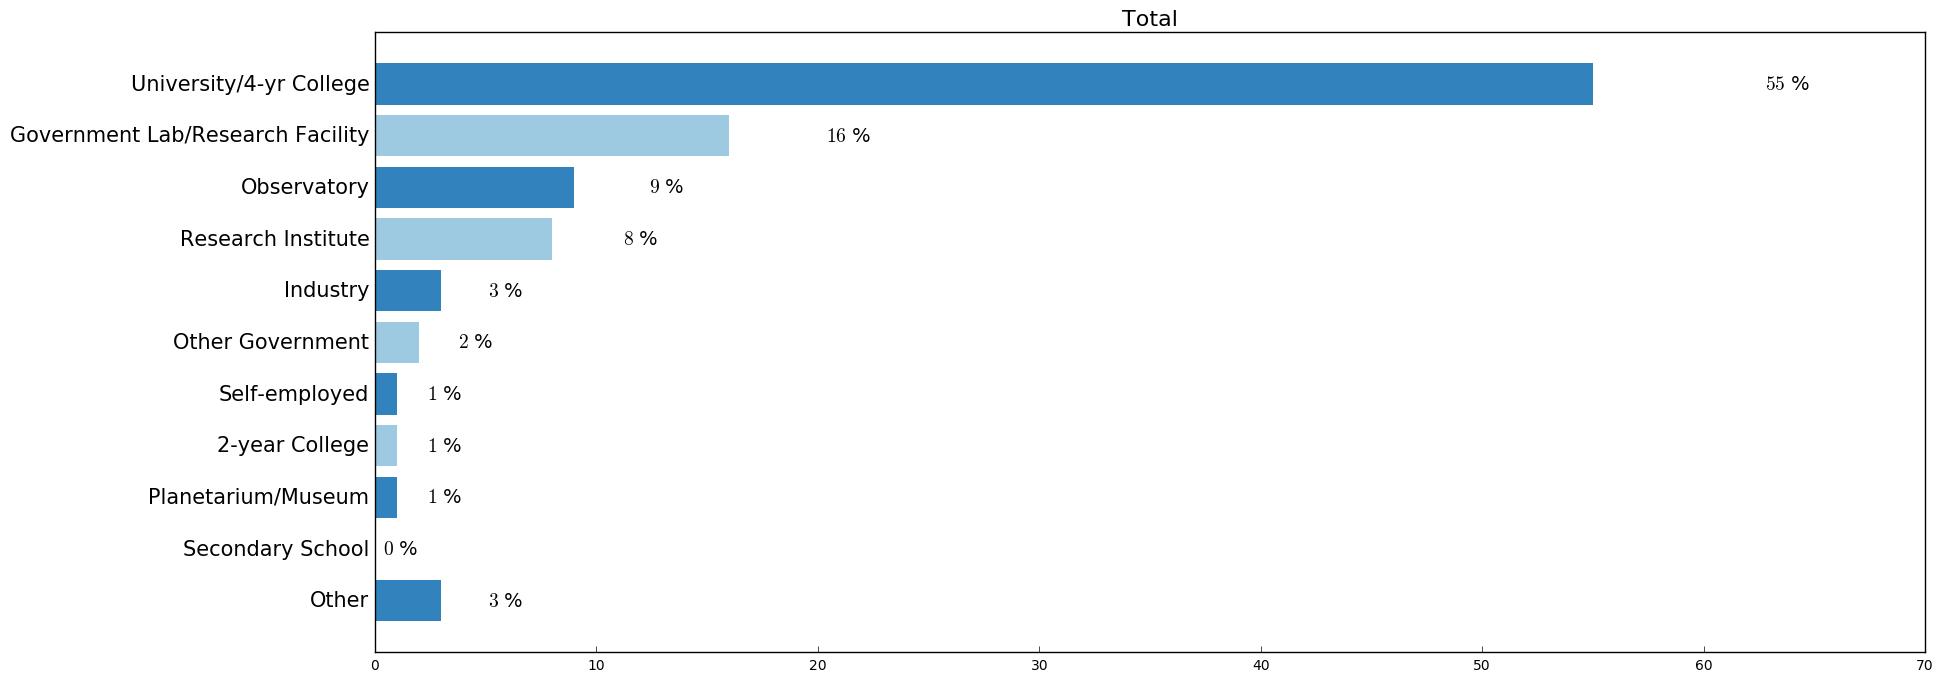

In [15]:
# Table 7 - Current employer
percent = [55,16,9,8,3,2,1,1,1,0,3]
number = [523,155,84,78,32,19,5,8,7,2,27]
# total = 940
labels = ['University/4-yr College','Government Lab/Research Facility','Observatory','Research Institute','Industry','Other Government','Self-employed','2-year College','Planetarium/Museum','Secondary School','Other']

len_data = len(number)

bins = np.arange(len_data, 0, -1)
colors = ['#3182bd','#9ecae1']*int(math.ceil(len_data/2))
fig,axes = plt.subplots(1, 4, sharey=True, figsize=(20,8))
fig.subplots_adjust(wspace=0)

a1 = plt.subplot(1,1,1)
make_bars_segment(a1, bins, np.array(percent), labels, np.sum(total_percent), 'Total', 70, 11)



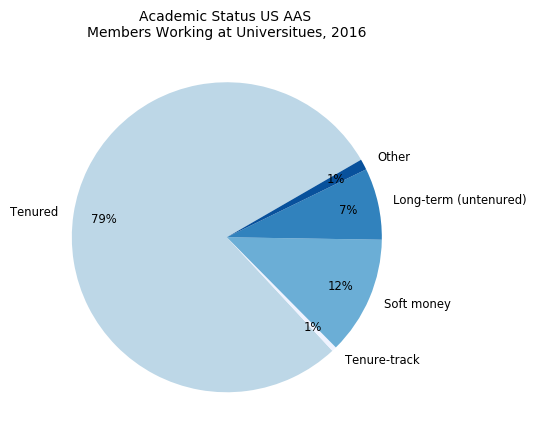

In [20]:
#Table 8 - academic status
# total: 560
percent = [57,17,8,16,2]
number = [317,95,47,89,12]
labels = ['Tenured','Tenure-track','Soft money','Long-term (untenured)','Other']

fig,axes = plt.subplots(1, 1, sharey=False, figsize=(5,5))

fig = plt.figure(1,figsize=(5,5))
a1 = plt.subplot(1,1,1)
colors=['#bdd7e7','#eff3ff','#6baed6','#3182bd','#08519c']
patches, texts, autotexts = a1.pie(num, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=30, pctdistance=0.8)
for t,tt in zip(texts,autotexts):
    tt.set_size('small')
    t.set_size('small')
a1.set_title('Academic Status US AAS \nMembers Working at Universitues, 2016', fontsize=10)

if save_plots:
    plt.savefig('degree_earned.pdf')

Employment - Postdocs and Careers
------------------------------------

In [86]:
# Table 9 - postdoctoral experience
# distributions of postdoc year of graduation, length of postdoc, employed with PhD postdoc duration, 
# Retired with PhD postdoc duration
percent_took_postdoc = [80,57]
labels_percent_took_postdoc = ['Employed with PhD','Retired with PhD']
median_postdoc_duration = [3,4,2]
labels_median_postdoc_duration = ['Current postdoc','Employed with PhD','Retired with PhD']

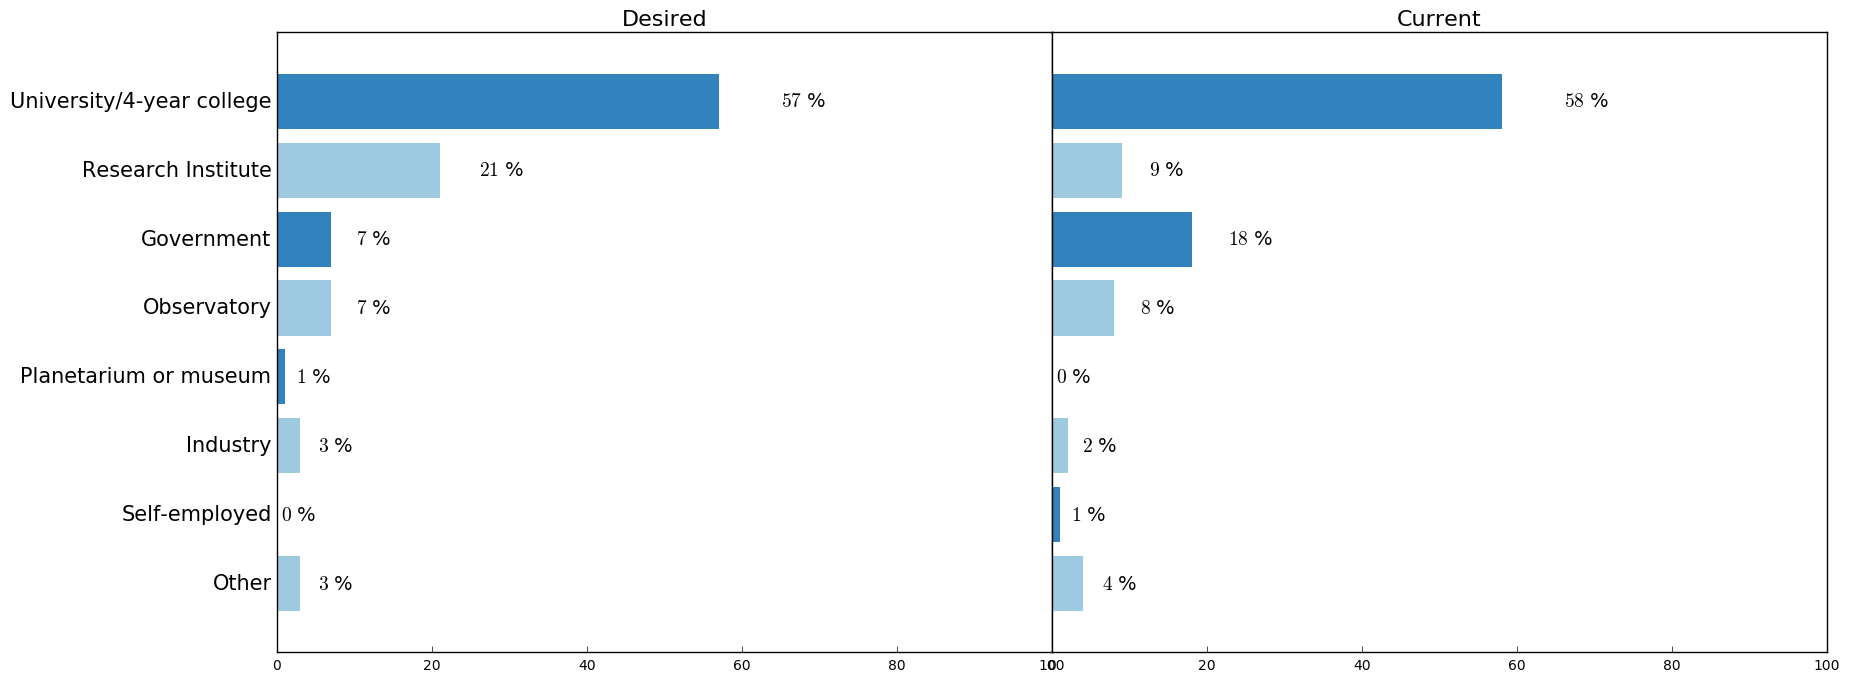

In [22]:
# Table 10 - Desired employer of postdocs
percent_desired = [57,21,7,7,1,3,0,3]
numbers_desired = [66,24,8,8,1,4,0,3]
labels = ['University/4-year college','Research Institute','Government','Observatory','Planetarium or museum','Industry','Self-employed','Other']

# Table 11 - Current employer of former postdoocs
percent_current = [58,9,18,8,0,2,1,4]
numbers_current = [502,80,160,72,4,21,5,31]

len_data = len(percent_desired)

bins = np.arange(len_data, 0, -1)
colors = ['#3182bd','#9ecae1']*int(math.ceil(len_data/2))
fig,axes = plt.subplots(1, 2, sharey=True, figsize=(20,8))
fig.subplots_adjust(wspace=0)

a1 = plt.subplot(1,2,1)
make_bars_segment(a1, bins, np.array(percent_desired), labels, np.sum(numbers_desired), 'Desired', 100, 8)

a2 = plt.subplot(1,2,2)
make_bars_segment(a2, bins, np.array(percent_current), None, np.sum(numbers_current), 'Current', 100,8)


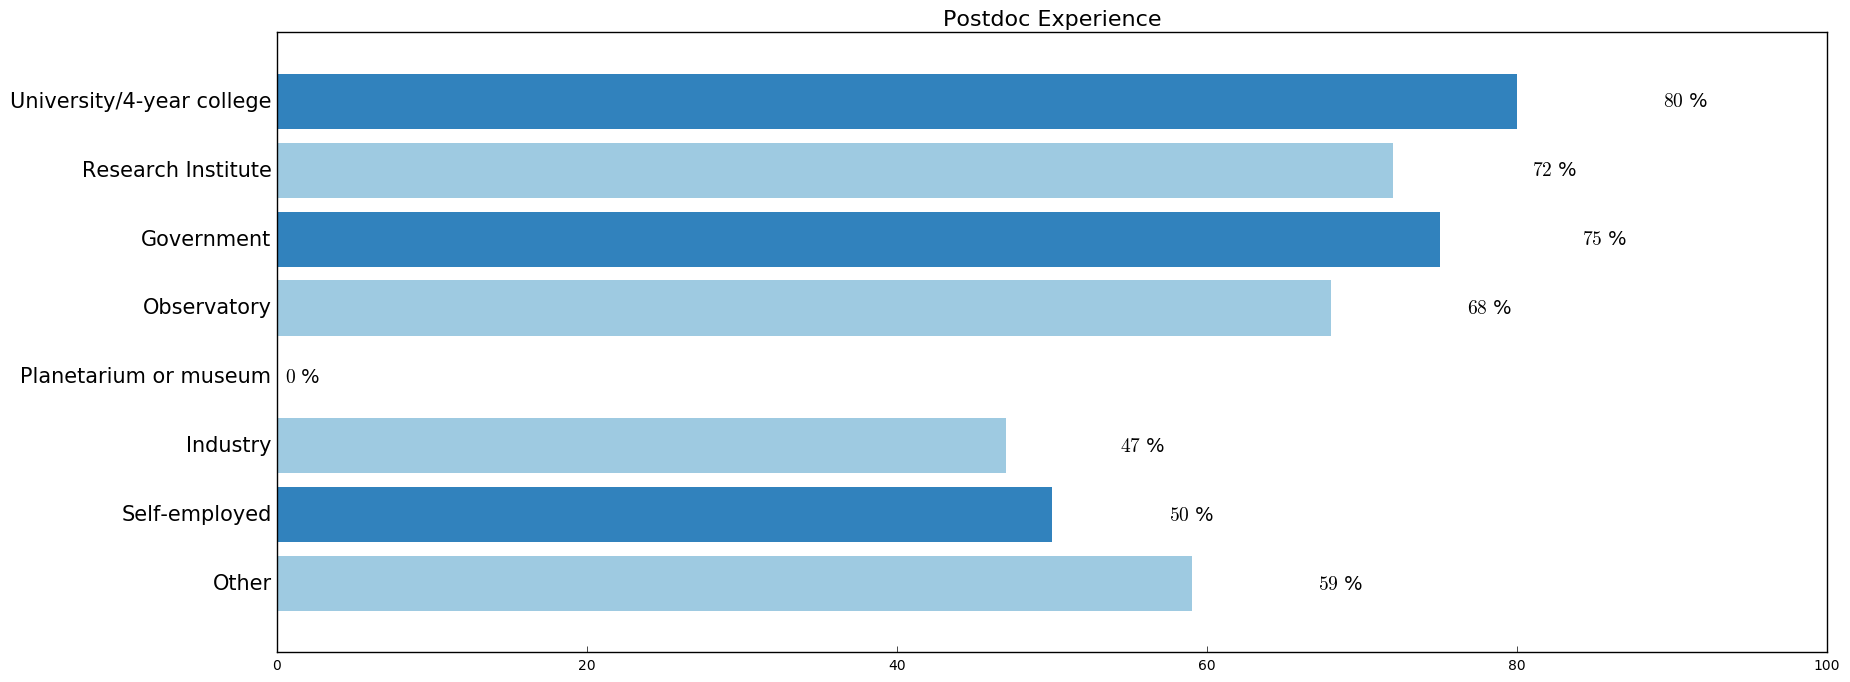

In [24]:
#Table 12 - postdoc experience by employer
# distributions, University+college, research places, postodocs
number = [628,111,179,106,0,45,10,41]
percent = [80,72,75,68,0,47,50,59]
labels = ['University/4-year college',\
          'Research Institute',\
          'Government',\
          'Observatory',\
          'Planetarium or museum',\
          'Industry',\
          'Self-employed',\
          'Other']
len_data = len(number)

bins = np.arange(len_data, 0, -1)
colors = ['#3182bd','#9ecae1']*int(math.ceil(len_data/2))
fig,axes = plt.subplots(1, 4, sharey=True, figsize=(20,8))
fig.subplots_adjust(wspace=0)

a1 = plt.subplot(1,1,1)
make_bars_segment(a1, bins, np.array(percent), labels, np.sum(numbers_desired), 'Postdoc Experience', 100, 8)


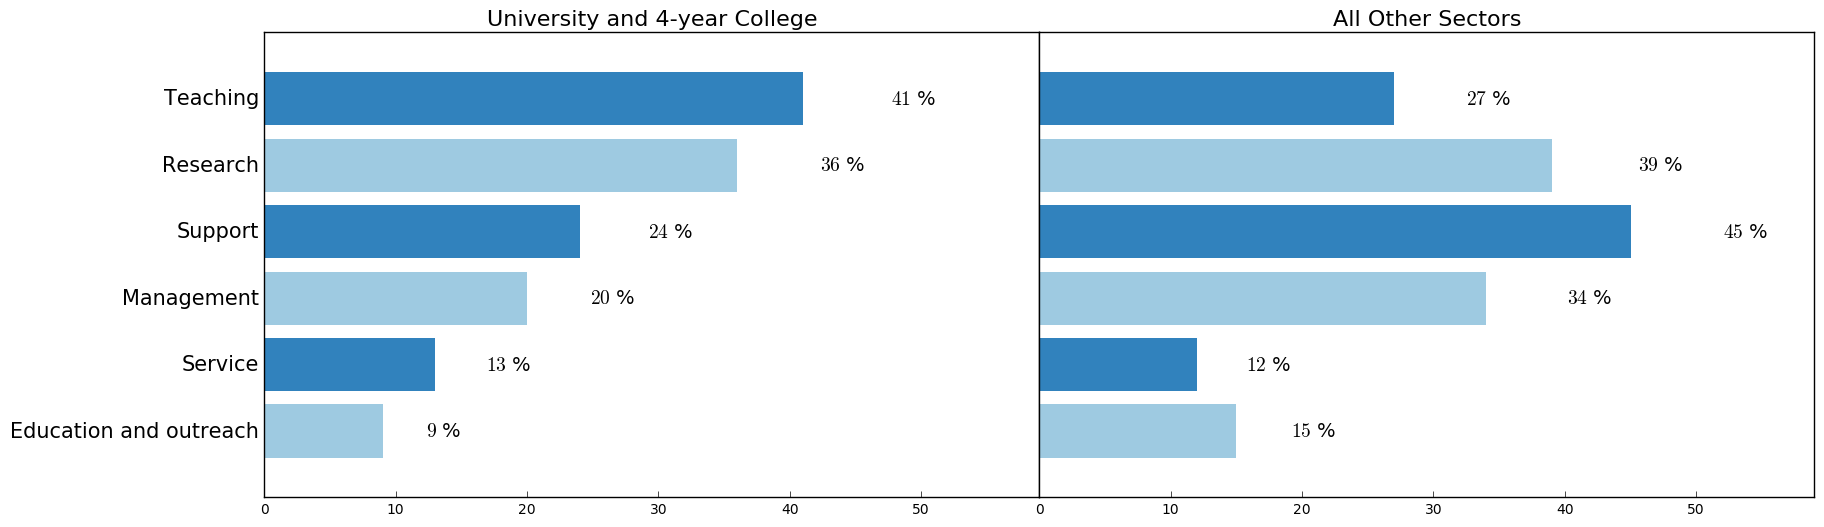

In [32]:
#Table 13 - Main Activity in Current Job

activity = ['Teaching',\
            'Research',\
            'Support',\
            'Management',\
            'Service',\
            'Education and outreach']

uni_percent = [41,36,24,20,13,9]
uni_number = [84,94,23,44,80,53]

other_percent = [27,39,45,34,12,15]
other_number = [23,76,47,51,57,37]


len_data = len(uni_percent)

bins = np.arange(len_data, 0, -1)
colors = ['#3182bd','#9ecae1']*int(math.ceil(len_data/2))
fig,axes = plt.subplots(1, 4, sharey=True, figsize=(20,6))
fig.subplots_adjust(wspace=0)

a1 = plt.subplot(1,2,1)
make_bars_segment(a1, bins, np.array(uni_percent), activity, np.sum(numbers_desired), 'University and 4-year College', 59, 6)

a2 = plt.subplot(1,2,2)
make_bars_segment(a2, bins, np.array(other_percent), None, np.sum(numbers_current), 'All Other Sectors', 59,6)


In [97]:
#Table 14 - Time allocation in current job

activity = ['Research',\
           'Teaching',\
           'Service activities',\
           'Education and public outreach',\
           'Management',\
           'Observatory/mission support, commission',
           'Other']

uni_average_time = [40,39,12,9,20,25,37]
uni_respondents_doing = [94,80,79,53,42,23,5]

other_average_time = [42,26,12,14,33,44,59]
other_respondents_doing = [77,23,57,38,49,46,14]

In [89]:
#Table 15 - primary areas of interest
# Venn diagrams for overlapping fields?
percent = [31,23,23,21,20,18,18,17,17,16,12,9,9,18]
number = [541,394,392,365,338,318,207,301,299,281,210,158,149,319]
labels = ['Star formation & evolution', 
'Galaxy formation & evolution', 
'Solar systems, planetary science', 
'Exoplanets',
'Astronomy education', 
'Interstellar medium',
'Galactic structure and stellar populations',
'Supernovae, GRBs, high-energy phenomena' ,
'Cosmology' ,
'Active galactic nuclei', 
'Clusters of galaxies, large-scale structure', 
'Astrobiology',
'Heliophysics',
'Other' ]
total = 1730

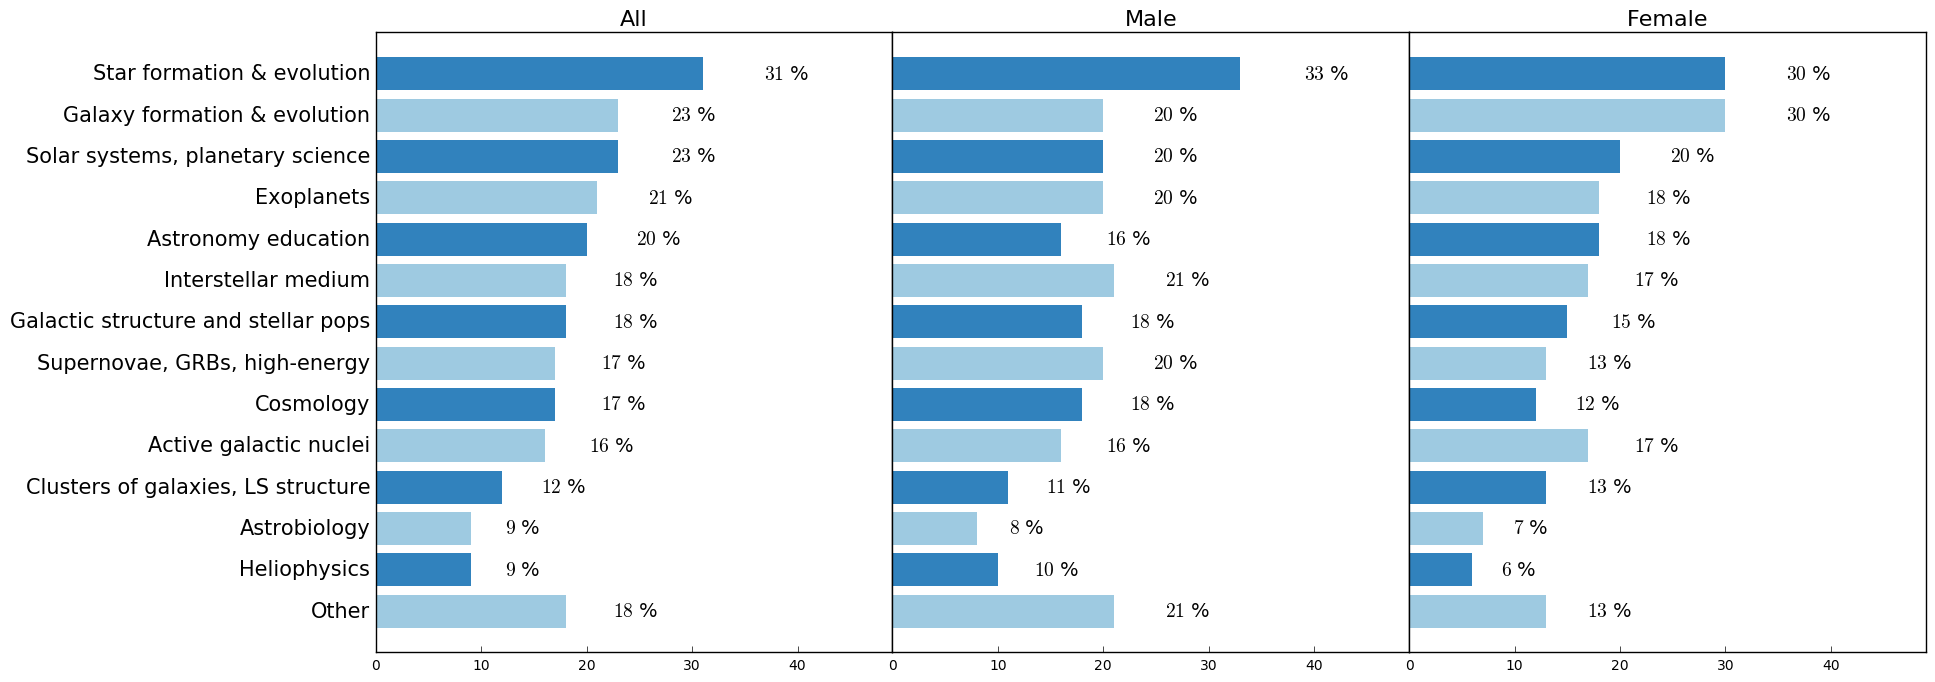

In [104]:
# Table 15b - Areas of interest by gender
# histograms
male_percent = [33,20,20,20,16,21,18,20,18,16,11,8,10,21]
male_number = [333,205,200,203,166,215,186,199,186,143,113,86,101,209]

female_percent = [30,30,20,18,18,17,15,13,12,17,13,7,6,13]
female_number = [91,91,60,54,55,52,47,44,37,53,41,21,19,40]

labels = ['Star formation & evolution', 
'Galaxy formation & evolution', 
'Solar systems, planetary science', 
'Exoplanets',
'Astronomy education', 
'Interstellar medium',
'Galactic structure and stellar pops',
'Supernovae, GRBs, high-energy' ,
'Cosmology' ,
'Active galactic nuclei', 
'Clusters of galaxies, LS structure', 
'Astrobiology',
'Heliophysics',
'Other' ]

len_data = len(percent)

bins = np.arange(len_data, 0, -1)
colors = ['#3182bd','#9ecae1']*int(math.ceil(len_data/2))
fig,(a1,a2,a3) = plt.subplots(1, 3, sharey=True, figsize=(20,8))
fig.subplots_adjust(wspace=0)

a1 = plt.subplot(1,3,1)
make_bars_segment(a1, bins, np.array(percent), labels, np.sum(number), 'All', 49, 14)

a2 = plt.subplot(1,3,2)
make_bars_segment(a2, bins, np.array(male_percent), None, np.sum(male_number), 'Male', 49,14)

a3 = plt.subplot(1,3,3)
make_bars_segment(a3, bins, np.array(female_percent), None, np.sum(female_number), 'Female', 49,14)


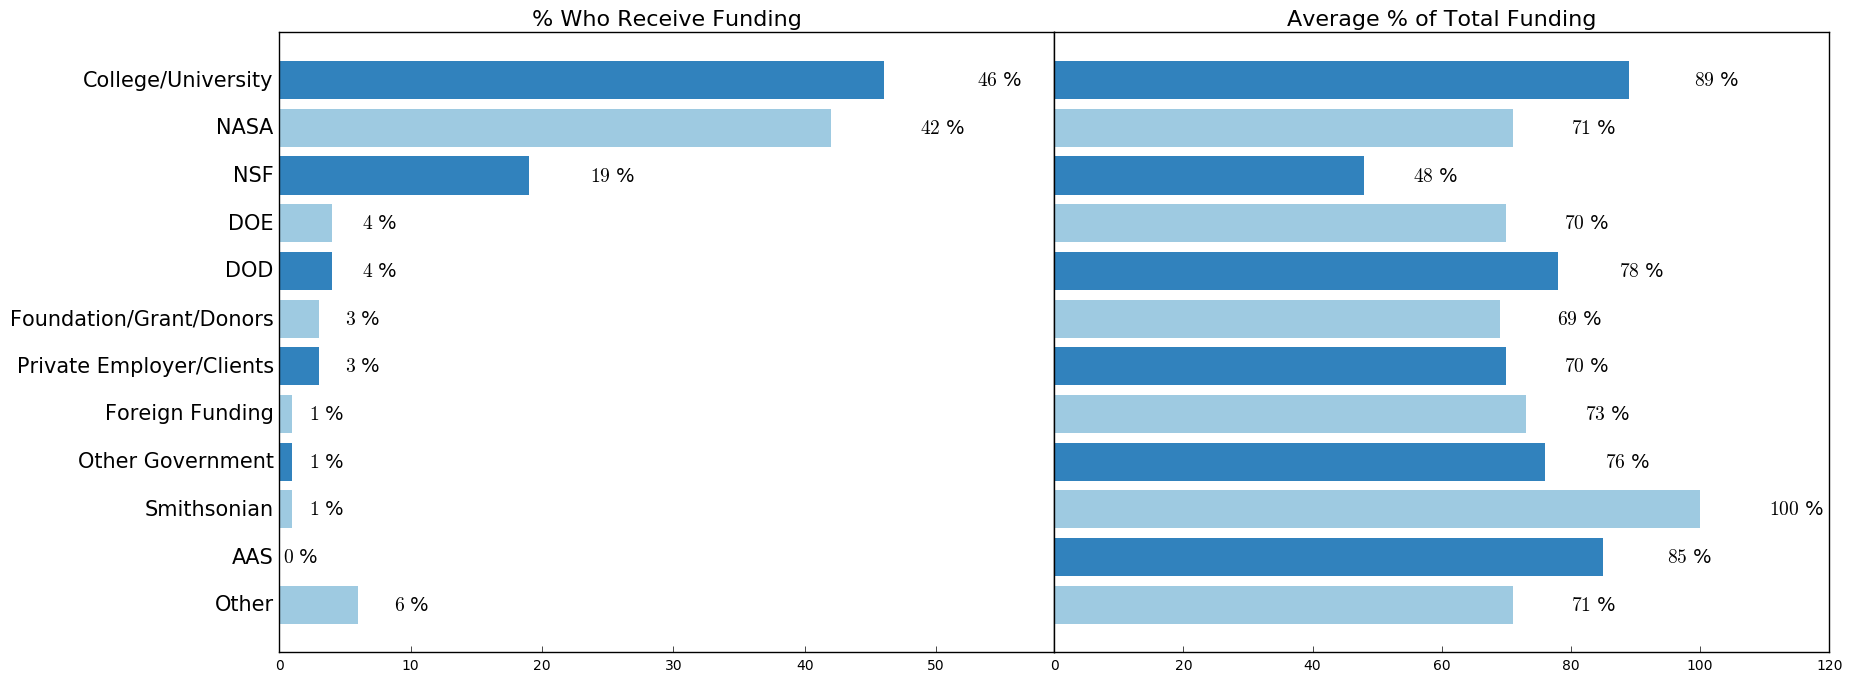

In [110]:
#Table 16 - Funding sources for salaries
# what does the total mean, also distibutions of the %s, only source of funding for all
labels = ['College/University','NASA','NSF','DOE','DOD','Foundation/Grant/Donors','Private Employer/Clients','Foreign Funding','Other Government','Smithsonian','AAS','Other']
percent_receiving_funding = [46,42,19,4,4,3,3,1,1,1,0,6]
percent_average_funding = [89,71,48,70,78,69,70,73,76,100,85,71]

len_data = len(percent_average_funding)

bins = np.arange(len_data, 0, -1)
colors = ['#3182bd','#9ecae1']*int(math.ceil(len_data/2))
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20,8))
fig.subplots_adjust(wspace=0)

a1 = plt.subplot(1,2,1)
make_bars_segment(a1, bins, np.array(percent_receiving_funding), labels, np.sum(number), '% Who Receive Funding', 59, 12)

a2 = plt.subplot(1,2,2)
make_bars_segment(a2, bins, np.array(percent_average_funding), None, np.sum(male_number), 'Average % of Total Funding', 120,12)


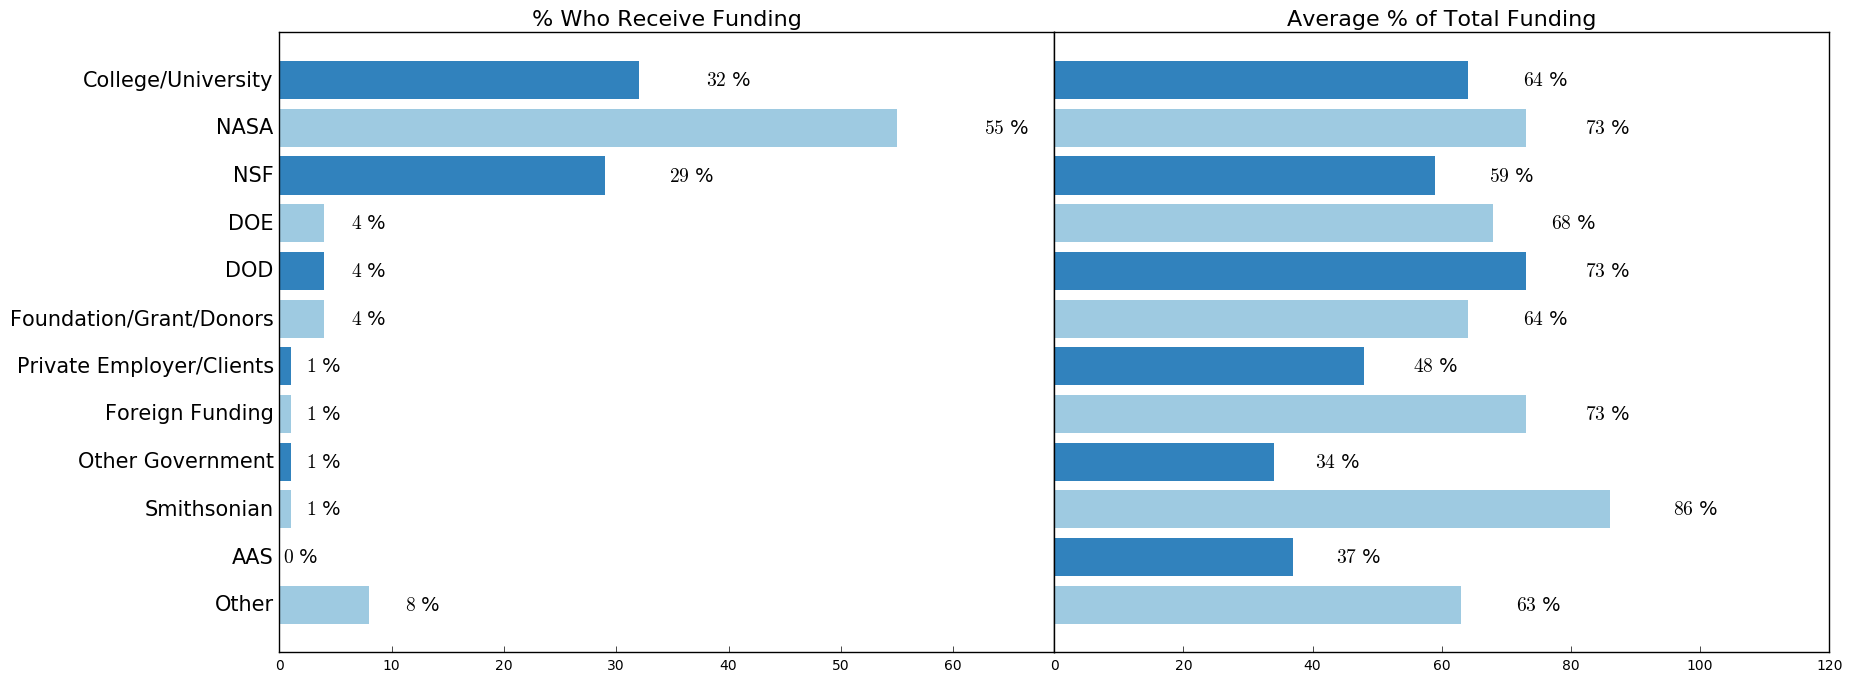

In [112]:
#Table 17 - Funding sources for research
# distributions for percentages, only source of funding % for all
labels = ['College/University','NASA',
          'NSF','DOE','DOD',
          'Foundation/Grant/Donors',
          'Private Employer/Clients',
          'Foreign Funding',
          'Other Government',
          'Smithsonian',
          'AAS',
          'Other']

percent_receiving_funding = [32,55,29,4,4,4,1,1,1,1,0,8]
percent_average_funding = [64,73,59,68,73,64,48,73,34,86,37,63]

len_data = len(percent_average_funding)

bins = np.arange(len_data, 0, -1)
colors = ['#3182bd','#9ecae1']*int(math.ceil(len_data/2))
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20,8))
fig.subplots_adjust(wspace=0)

a1 = plt.subplot(1,2,1)
make_bars_segment(a1, bins, np.array(percent_receiving_funding), labels, np.sum(number), '% Who Receive Funding', 69, 12)

a2 = plt.subplot(1,2,2)
make_bars_segment(a2, bins, np.array(percent_average_funding), None, np.sum(male_number), 'Average % of Total Funding', 120,12)


In [103]:
#Table 18 - Variables impacting salaries
"""
distributions of salaries for different levels! will allow people to see how what is offered to them compares to the distribution
- also, can we track how there additional bonuses have changed as a function of time? how far back does this analysis go?
"""

In [104]:
#Table 19 - Encouraging the pursuit of astronomy
labels = ['Definitiely/Probably','Possibly','No or Do not know']
students = [77,19,4]
postdoc = [52,42,6]
employed = [70,26,4]
retired = [82,15,3]
total = [72,24,4]



AAS Members - Demographics and Family
--------------------------------------

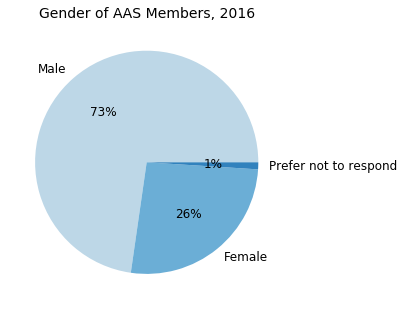

In [121]:
#Table 20 - gender
"""
can we do this as a function of level of education? Not sure that the age split is most relevant, track change as a function of time?
Why is the split at 1983?
"""
labels = ['Male','Female','Prefer not to respond']
percent = [72,26,1]
total = 1683

fig,axes = plt.subplots(1, 1, sharey=False, figsize=(5,5))

fig = plt.figure(1,figsize=(5,5))
a1 = plt.subplot(1,1,1)
colors=['#bdd7e7','#6baed6','#3182bd','#08519c']
a1.pie(percent, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=0, pctdistance=0.6)
a1.set_title('Gender of AAS Members, 2016', fontsize=14)

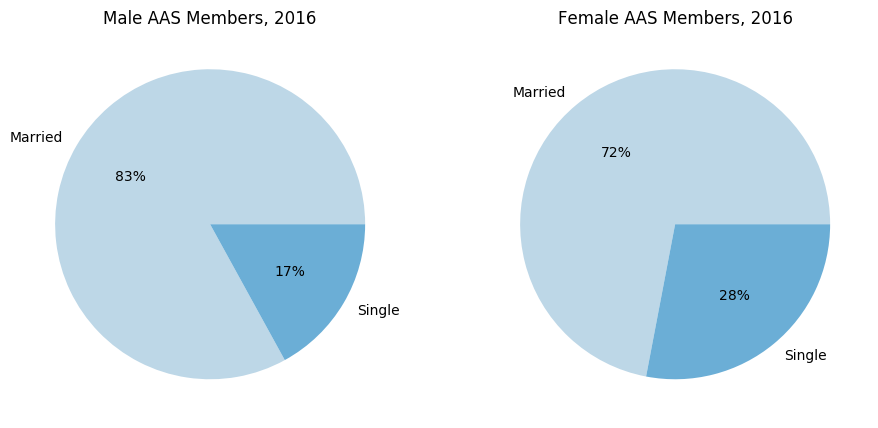

In [55]:
#Table 21 - marriage
# what are the numbers for the US overall?

labels = ['Married','Single']
male = [83,17]
female = [72,28]

fig,(a1, a2) = plt.subplots(1, 2, sharey=False, figsize=(11,5))

colors=['#bdd7e7','#6baed6']
a1.pie(male, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=0, pctdistance=0.6)
a1.set_title('Male AAS Members, 2016', fontsize=12)

a2.pie(female, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=0, pctdistance=0.6)
a2.set_title('Female AAS Members, 2016', fontsize=12)

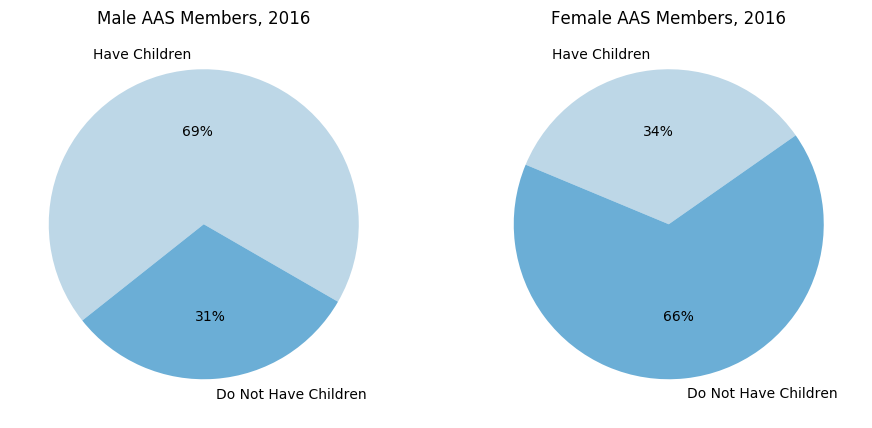

In [64]:
# Table 22 - children
### Why are these so different?
labels = ['Have Children','Do Not Have Children']
male = [69,31]
female = [34,66]

### Of the members with children who attended AAS meetings, 18 % used childcare

fig,(a1, a2) = plt.subplots(1, 2, sharey=False, figsize=(11,5))

colors=['#bdd7e7','#6baed6']
a1.pie(male, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=-30, pctdistance=0.6)
a1.set_title('Male AAS Members, 2016', fontsize=12)

a2.pie(female, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=35, pctdistance=0.6)
a2.set_title('Female AAS Members, 2016', fontsize=12)

In [109]:
#table 23 - Relocated with spouse or partner
labels = ['Yes','No','N/A']
male = []
female = []


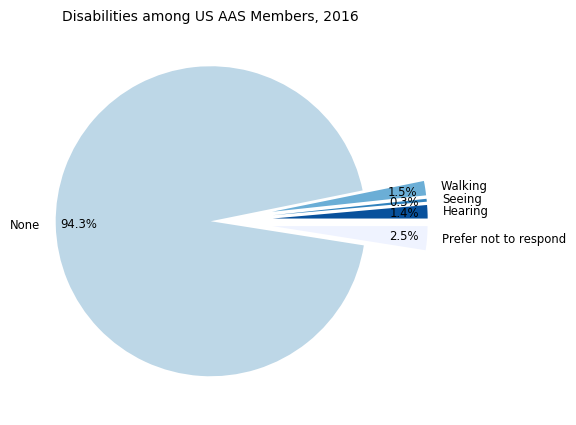

In [80]:
#Table 24 - Disabilities
labels = ['Hearing','Seeing','Walking','None','Prefer not to respond']
number = [1.4,0.3,1.5,94.7,2.5]

fig,axes = plt.subplots(1, 1, sharey=False, figsize=(5,5))

fig = plt.figure(1,figsize=(5,5))
a1 = plt.subplot(1,1,1)
colors=['#08519c','#3182bd','#6baed6','#bdd7e7','#eff3ff']
explode = (0.4, 0.4, 0.4, 0,0.4)
patches, texts, autotexts = a1.pie(number, labels=labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow=False, startangle=0, pctdistance=0.85)
for t,tt in zip(texts,autotexts):
    tt.set_size('small')
    t.set_size('small')
a1.set_title('Disabilities among US AAS Members, 2016', fontsize=10)


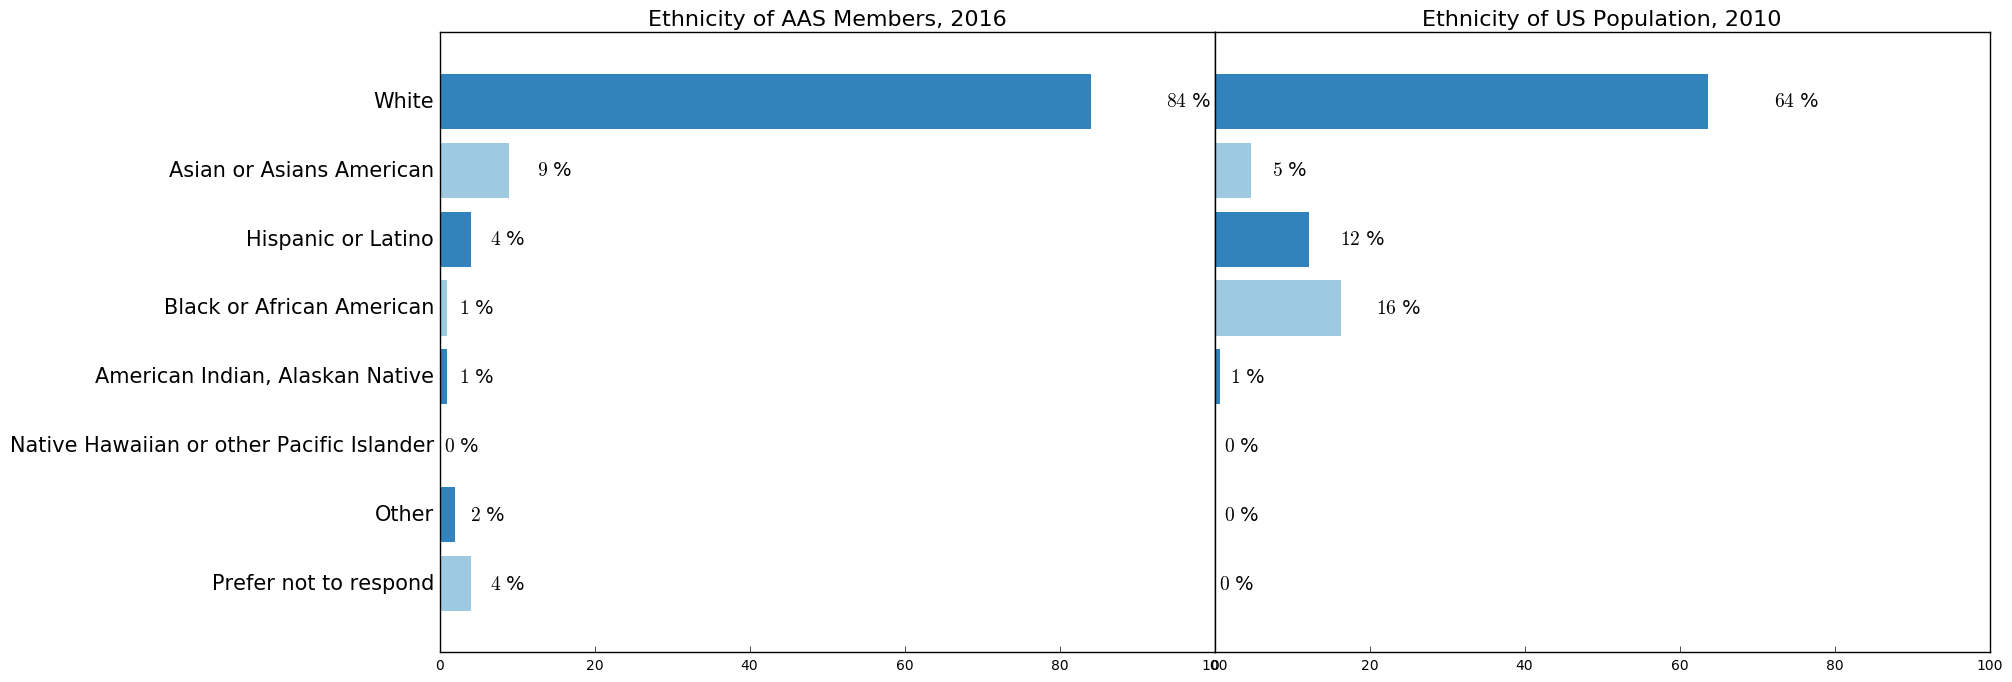

In [129]:
#Table 25 - Ethnicity
labels = ['White', 'Asian or Asians American','Hispanic or Latino','Black or African American','American Indian, Alaskan Native','Native Hawaiian or other Pacific Islander','Other','Prefer not to respond']
percent = [84,9,4,1,1,0,2,4]
number = [1443,157,61,18,12,2,32,67]
us_percent = [63.7, 4.7, 12.2, 16.3, 0.7, 0.2, 0.2, 0.0]
# sum exceeds 100 % because respondents checked more than one etnicity
#3.7\% check more than one etnicity
### compare to general population

len_data = len(number)

bins = np.arange(len_data, 0, -1)
colors = ['#3182bd','#9ecae1']*int(math.ceil(len_data/2))
fig,axes = plt.subplots(1, 2, sharey=True, figsize=(20,8))
fig.subplots_adjust(wspace=0)

a1 = plt.subplot(1,2,1)
make_bars_segment(a1, bins, np.array(percent), labels, np.sum(number), 'Ethnicity of AAS Members, 2016', 100, 8)

a2 = plt.subplot(1,2,2)
make_bars_segment(a2, bins, np.array(us_percent), None, np.sum(number), 'Ethnicity of US Population, 2010', 100, 8)



[ 0.87965116  0.02093023  0.02383721  0.00232558  0.07325581]


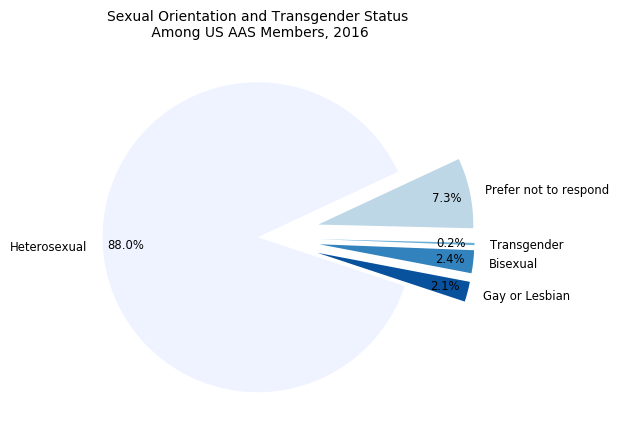

In [126]:
# Table 26 - Sexual orientation and transgender status
labels = ['Heterosexual','Gay or Lesbian','Bisexual','Transgender','Prefer not to respond']
percent = [88.0,2.1,2.4,0.2,7.3]
number = [1513,36,41,4,126]
print(np.array(number)/1720.)

fig,axes = plt.subplots(1, 1, sharey=False, figsize=(5,5))

fig = plt.figure(1,figsize=(5,5))
a1 = plt.subplot(1,1,1)
colors=['#eff3ff','#08519c','#3182bd','#6baed6','#bdd7e7']
explode = (0., 0.4, 0.4, 0.4,0.4)
patches, texts, autotexts = a1.pie(number, labels=labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow=False, startangle=25, pctdistance=0.85)
for t,tt in zip(texts,autotexts):
    tt.set_size('small')
    t.set_size('small')
a1.set_title('Sexual Orientation and Transgender Status\n Among US AAS Members, 2016', fontsize=10)
